In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlretrieve

In [8]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [9]:
url= "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['X1','X2','X3', 'class']
data=pd.read_csv(url, names=names)
data

,X1,X2,X3,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...
6.7,3.0,5.2,2.3,Iris-virginica
6.3,2.5,5.0,1.9,Iris-virginica
6.5,3.0,5.2,2.0,Iris-virginica
6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
data.isnull().sum()

X1       0
X2       0
X3       0
class    0
dtype: int64

In [11]:
data.replace('Iris-setosa', 1, inplace=True)
data.replace('Iris-versicolor', 2, inplace=True)
data.replace('Iris-virginica', 3, inplace=True)

In [12]:
data

,X1,X2,X3,class
5.1,3.5,1.4,0.2,1
4.9,3.0,1.4,0.2,1
4.7,3.2,1.3,0.2,1
4.6,3.1,1.5,0.2,1
5.0,3.6,1.4,0.2,1
...,...,...,...,...
6.7,3.0,5.2,2.3,3
6.3,2.5,5.0,1.9,3
6.5,3.0,5.2,2.0,3
6.2,3.4,5.4,2.3,3


In [13]:
data['class'].value_counts()

class
1    50
2    50
3    50
Name: count, dtype: int64

array([[<Axes: title={'center': 'X1'}>, <Axes: title={'center': 'X2'}>],
       [<Axes: title={'center': 'X3'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

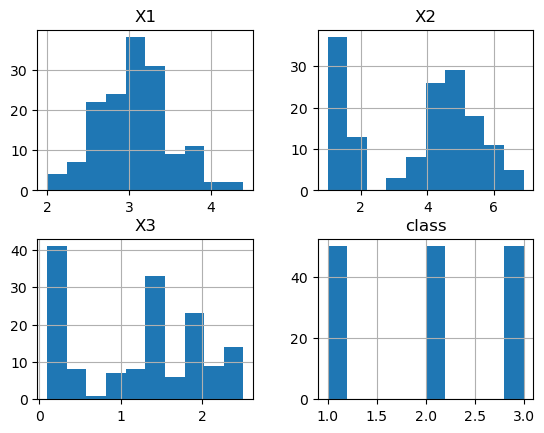

In [14]:
data.hist(layout=(2,2))

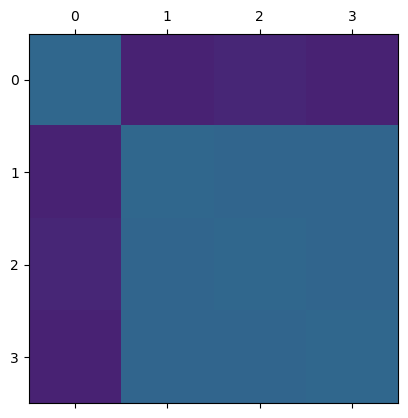

In [15]:
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(data.corr(),vmin=-1, vmax=5)

<Axes: >

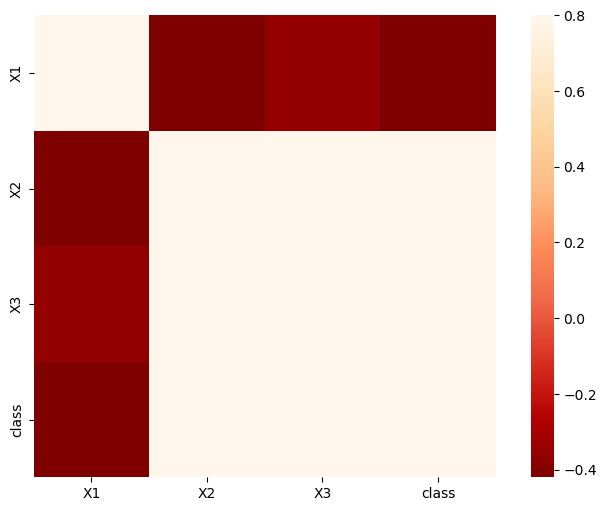

In [16]:
matrix=data.corr()
ax= plt.subplots(figsize=(9,6))
sns.heatmap(matrix, vmax=0.8, square=True, cmap='OrRd_r')

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

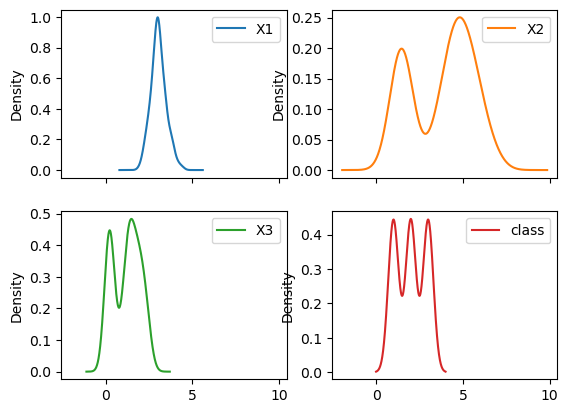

In [17]:
data.plot(kind='density',subplots=True, layout=(2,2))

In [18]:
array=data.values
x=array[:,:3]
y=array[:,3]

In [19]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
seed=8
models=[]
models.append(('LR',LogisticRegression()))
models.append(('SVM',SVC()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))

results=[]
names=[]
scoring='accuracy'
test_size=0.33
seed=8

for name, model in models:
    kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size, random_state=seed)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg= "%s: %f (%f)" % (name , cv_results.mean()*100, cv_results.std())
    print(msg)

LR: 97.000000 (0.016125)
SVM: 96.800000 (0.025612)
LDA: 97.200000 (0.016000)
KNN: 96.200000 (0.016613)
CART: 95.200000 (0.031241)
NB: 96.400000 (0.019596)


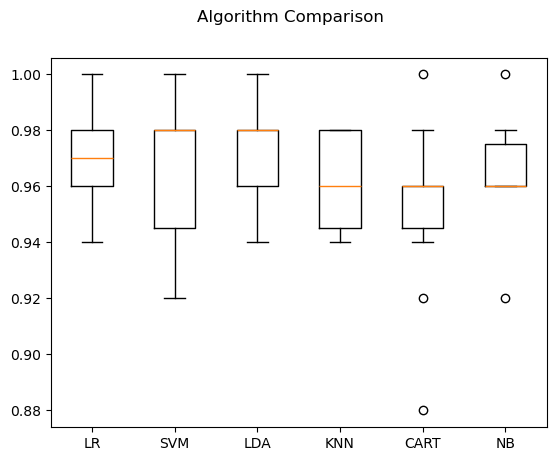

In [20]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline=[]
pipeline.append(('scaledLR',  Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipeline.append(('scalerSVM', Pipeline([('scaler', StandardScaler()), ('SVM', SVC())])))
pipeline.append(('scaledNB', Pipeline([('scaler', StandardScaler()), ('NB', GaussianNB())])))
pipeline.append(('scaledLDA', Pipeline([('scaler', StandardScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipeline.append(('scaledKNN', Pipeline([('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())])))
pipeline.append(('scaledCART', Pipeline([('scaler', StandardScaler()), ('CART', DecisionTreeClassifier())])))

In [22]:
from sklearn import feature_selection
seed=8
test_size=0.33
results=[]
names=[]
for name, model in pipeline:
    kfold=model_selection.ShuffleSplit(n_splits=10, random_state=seed, test_size=test_size)
    cv_results=model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

scaledLR: 95.200000 (0.020396)
scalerSVM: 96.600000 (0.018000)
scaledNB: 96.400000 (0.019596)
scaledLDA: 97.200000 (0.016000)
scaledKNN: 96.200000 (0.016613)
scaledCART: 95.200000 (0.031241)


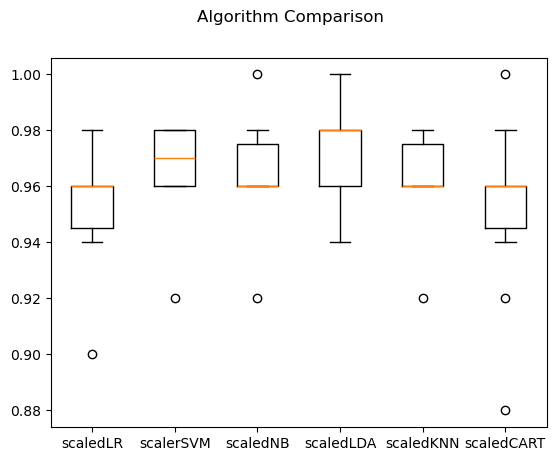

In [23]:
fig=plt.figure()
fig.suptitle('Algorithm Comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
scaler=StandardScaler().fit(x)
rescaled_x=scaler.transform(x)
neighbors=(1,3,5,7,9,11,13,15,17,19,21)
param_grid=dict(n_neighbors=neighbors)
model=KNeighborsClassifier()
kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size, random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaled_x,y)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.966000 using {'n_neighbors': 21}


In [25]:
scaler=StandardScaler().fit(x)
rescaled_x=scaler.transform(x)
c_values=(0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0)
kernel_values=['linear', 'poly', 'rbf', 'sigmoid']
param_grid=dict(C=c_values, kernel=kernel_values)
model=SVC()
kfold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size, random_state=seed)
grid=GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result=grid.fit(rescaled_x,y)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: 0.974000 using {'C': 0.3, 'kernel': 'linear'}


In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [27]:
ensembles=[]
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))

results=[]
names=[]

for name, model in ensembles:
    kfold=fold=model_selection.ShuffleSplit(n_splits=10,test_size=test_size, random_state=seed)
    cv_results=model_selection.cross_val_score(model,x,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
    print(msg)

AB: 94.600000 (0.025377)
GBM: 95.400000 (0.035833)
RF: 95.800000 (0.018868)
ET: 95.000000 (0.020494)
